# Importing Dataset and Libraries

In [13]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
loan_df = pd.read_csv("loan_approval_dataset.csv")

In [15]:
loan_df.head(10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   
5      13500000          10           319                    6800000   
6      33000000           4           678                   22500000   
7      15000000          20           382                   13200000   
8       2200000          20           782                    1300000   
9       4300000          10           388                    3200000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   
5                   8300000              13700000            5100000   
6                  14800000              29200000            4300000   
7                   5700000              11800000            6000000   
8                    800000               2800000             600000   
9                   1400000               3300000            1600000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected  
5     Rejected  
6     Approved  
7     Rejected  
8     Approved  
9     Rejected

# Data Preprocessing

- Cleaning
- Reduction
- Transformation
- Oversampling (data set not large enough to undersample, have to create simultated values with chance of overfitting)

In [16]:
loan_df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [17]:
loan_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [18]:
loan_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [19]:
loan_df = loan_df.rename(columns = {
                        "loan_id": "loan_id",
                        " no_of_dependents": "dependents", 
                        " education": "education",
                        " self_employed": "self_employed",
                        " income_annum": "income_annum",
                        " loan_amount" : "loan_amount", 
                        " cibil_score" : "cibil_score",
                        " residential_assets_value" : "residential_assets",
                        " commercial_assets_value" : "commercial_assets",
                        " luxury_assets_value" : "luxury_assets",
                        " bank_asset_value" : "bank_asset",
                        " loan_status" : "loan_status"
                         })

loan_df


loan_id  dependents      education self_employed  income_annum  \
0           1           2       Graduate            No       9600000   
1           2           0   Not Graduate           Yes       4100000   
2           3           3       Graduate            No       9100000   
3           4           3       Graduate            No       8200000   
4           5           5   Not Graduate           Yes       9800000   
...       ...         ...            ...           ...           ...   
4264     4265           5       Graduate           Yes       1000000   
4265     4266           0   Not Graduate           Yes       3300000   
4266     4267           2   Not Graduate            No       6500000   
4267     4268           1   Not Graduate            No       4100000   
4268     4269           1       Graduate            No       9200000   

      loan_amount   loan_term  cibil_score  residential_assets  \
0        29900000          12          778             2400000   
1        12200000           8          417             2700000   
2        29700000          20          506             7100000   
3        30700000           8          467            18200000   
4        24200000          20          382            12400000   
...           ...         ...          ...                 ...   
4264      2300000          12          317             2800000   
4265     11300000          20          559             4200000   
4266     23900000          18          457             1200000   
4267     12800000           8          780             8200000   
4268     29700000          10          607            17800000   

      commercial_assets  luxury_assets  bank_asset loan_status  
0              17600000       22700000     8000000    Approved  
1               2200000        8800000     3300000    Rejected  
2               4500000       33300000    12800000    Rejected  
3               3300000       23300000     7900000    Rejected  
4               8200000       29400000     5000000    Rejected  
...                 ...            ...         ...         ...  
4264             500000        3300000      800000    Rejected  
4265            2900000       11000000     1900000    Approved  
4266           12400000       18100000     7300000    Rejected  
4267             700000       14100000     5800000    Approved  
4268           11800000       35700000    12000000    Approved  

[4269 rows x 13 columns]

In [20]:
total_assets = loan_df["residential_assets"] + loan_df["commercial_assets"] + loan_df["luxury_assets"]

loan_df.insert(8, "total_assets", total_assets)

loan_df

loan_id  dependents      education self_employed  income_annum  \
0           1           2       Graduate            No       9600000   
1           2           0   Not Graduate           Yes       4100000   
2           3           3       Graduate            No       9100000   
3           4           3       Graduate            No       8200000   
4           5           5   Not Graduate           Yes       9800000   
...       ...         ...            ...           ...           ...   
4264     4265           5       Graduate           Yes       1000000   
4265     4266           0   Not Graduate           Yes       3300000   
4266     4267           2   Not Graduate            No       6500000   
4267     4268           1   Not Graduate            No       4100000   
4268     4269           1       Graduate            No       9200000   

      loan_amount   loan_term  cibil_score  total_assets  residential_assets  \
0        29900000          12          778      42700000             2400000   
1        12200000           8          417      13700000             2700000   
2        29700000          20          506      44900000             7100000   
3        30700000           8          467      44800000            18200000   
4        24200000          20          382      50000000            12400000   
...           ...         ...          ...           ...                 ...   
4264      2300000          12          317       6600000             2800000   
4265     11300000          20          559      18100000             4200000   
4266     23900000          18          457      31700000             1200000   
4267     12800000           8          780      23000000             8200000   
4268     29700000          10          607      65300000            17800000   

      commercial_assets  luxury_assets  bank_asset loan_status  
0              17600000       22700000     8000000    Approved  
1               2200000        8800000     3300000    Rejected  
2               4500000       33300000    12800000    Rejected  
3               3300000       23300000     7900000    Rejected  
4               8200000       29400000     5000000    Rejected  
...                 ...            ...         ...         ...  
4264             500000        3300000      800000    Rejected  
4265            2900000       11000000     1900000    Approved  
4266           12400000       18100000     7300000    Rejected  
4267             700000       14100000     5800000    Approved  
4268           11800000       35700000    12000000    Approved  

[4269 rows x 14 columns]

In [21]:
loan_df.drop(loan_df.iloc[:, 9:12], axis = 1, inplace = True)
loan_df

loan_id  dependents      education self_employed  income_annum  \
0           1           2       Graduate            No       9600000   
1           2           0   Not Graduate           Yes       4100000   
2           3           3       Graduate            No       9100000   
3           4           3       Graduate            No       8200000   
4           5           5   Not Graduate           Yes       9800000   
...       ...         ...            ...           ...           ...   
4264     4265           5       Graduate           Yes       1000000   
4265     4266           0   Not Graduate           Yes       3300000   
4266     4267           2   Not Graduate            No       6500000   
4267     4268           1   Not Graduate            No       4100000   
4268     4269           1       Graduate            No       9200000   

      loan_amount   loan_term  cibil_score  total_assets  bank_asset  \
0        29900000          12          778      42700000     8000000   
1        12200000           8          417      13700000     3300000   
2        29700000          20          506      44900000    12800000   
3        30700000           8          467      44800000     7900000   
4        24200000          20          382      50000000     5000000   
...           ...         ...          ...           ...         ...   
4264      2300000          12          317       6600000      800000   
4265     11300000          20          559      18100000     1900000   
4266     23900000          18          457      31700000     7300000   
4267     12800000           8          780      23000000     5800000   
4268     29700000          10          607      65300000    12000000   

     loan_status  
0       Approved  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
...          ...  
4264    Rejected  
4265    Approved  
4266    Rejected  
4267    Approved  
4268    Approved  

[4269 rows x 11 columns]

In [22]:
newcol = np.where(loan_df["education"] == " Graduate", 1, 0)
newcol

array([1, 0, 1, ..., 0, 0, 1])

In [23]:
loan_df["education"] = newcol

loan_df

loan_id  dependents  education self_employed  income_annum  loan_amount  \
0           1           2          1            No       9600000     29900000   
1           2           0          0           Yes       4100000     12200000   
2           3           3          1            No       9100000     29700000   
3           4           3          1            No       8200000     30700000   
4           5           5          0           Yes       9800000     24200000   
...       ...         ...        ...           ...           ...          ...   
4264     4265           5          1           Yes       1000000      2300000   
4265     4266           0          0           Yes       3300000     11300000   
4266     4267           2          0            No       6500000     23900000   
4267     4268           1          0            No       4100000     12800000   
4268     4269           1          1            No       9200000     29700000   

       loan_term  cibil_score  total_assets  bank_asset loan_status  
0             12          778      42700000     8000000    Approved  
1              8          417      13700000     3300000    Rejected  
2             20          506      44900000    12800000    Rejected  
3              8          467      44800000     7900000    Rejected  
4             20          382      50000000     5000000    Rejected  
...          ...          ...           ...         ...         ...  
4264          12          317       6600000      800000    Rejected  
4265          20          559      18100000     1900000    Approved  
4266          18          457      31700000     7300000    Rejected  
4267           8          780      23000000     5800000    Approved  
4268          10          607      65300000    12000000    Approved  

[4269 rows x 11 columns]

In [24]:
newcol2 = np.where(loan_df["self_employed"] == " Yes", 1, 0)
newcol

array([1, 0, 1, ..., 0, 0, 1])

In [25]:
loan_df["self_employed"] = newcol2

loan_df

loan_id  dependents  education  self_employed  income_annum  \
0           1           2          1              0       9600000   
1           2           0          0              1       4100000   
2           3           3          1              0       9100000   
3           4           3          1              0       8200000   
4           5           5          0              1       9800000   
...       ...         ...        ...            ...           ...   
4264     4265           5          1              1       1000000   
4265     4266           0          0              1       3300000   
4266     4267           2          0              0       6500000   
4267     4268           1          0              0       4100000   
4268     4269           1          1              0       9200000   

      loan_amount   loan_term  cibil_score  total_assets  bank_asset  \
0        29900000          12          778      42700000     8000000   
1        12200000           8          417      13700000     3300000   
2        29700000          20          506      44900000    12800000   
3        30700000           8          467      44800000     7900000   
4        24200000          20          382      50000000     5000000   
...           ...         ...          ...           ...         ...   
4264      2300000          12          317       6600000      800000   
4265     11300000          20          559      18100000     1900000   
4266     23900000          18          457      31700000     7300000   
4267     12800000           8          780      23000000     5800000   
4268     29700000          10          607      65300000    12000000   

     loan_status  
0       Approved  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
...          ...  
4264    Rejected  
4265    Approved  
4266    Rejected  
4267    Approved  
4268    Approved  

[4269 rows x 11 columns]

In [26]:
newcol3 = np.where(loan_df["loan_status"] == " Approved", 1, 0)
newcol2

array([0, 1, 0, ..., 0, 0, 0])

In [27]:
loan_df["loan_status"] = newcol3

loan_df

loan_id  dependents  education  self_employed  income_annum  \
0           1           2          1              0       9600000   
1           2           0          0              1       4100000   
2           3           3          1              0       9100000   
3           4           3          1              0       8200000   
4           5           5          0              1       9800000   
...       ...         ...        ...            ...           ...   
4264     4265           5          1              1       1000000   
4265     4266           0          0              1       3300000   
4266     4267           2          0              0       6500000   
4267     4268           1          0              0       4100000   
4268     4269           1          1              0       9200000   

      loan_amount   loan_term  cibil_score  total_assets  bank_asset  \
0        29900000          12          778      42700000     8000000   
1        12200000           8          417      13700000     3300000   
2        29700000          20          506      44900000    12800000   
3        30700000           8          467      44800000     7900000   
4        24200000          20          382      50000000     5000000   
...           ...         ...          ...           ...         ...   
4264      2300000          12          317       6600000      800000   
4265     11300000          20          559      18100000     1900000   
4266     23900000          18          457      31700000     7300000   
4267     12800000           8          780      23000000     5800000   
4268     29700000          10          607      65300000    12000000   

      loan_status  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
4264            0  
4265            1  
4266            0  
4267            1  
4268            1  

[4269 rows x 11 columns]

In [28]:
y = loan_df.iloc[:,-1] # Define response
x = loan_df.iloc[:,0:13] # Define Predictors (variables)

In [29]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

Class 0:  1613
Class 1:  2656
Proportion: 0.61 : 1


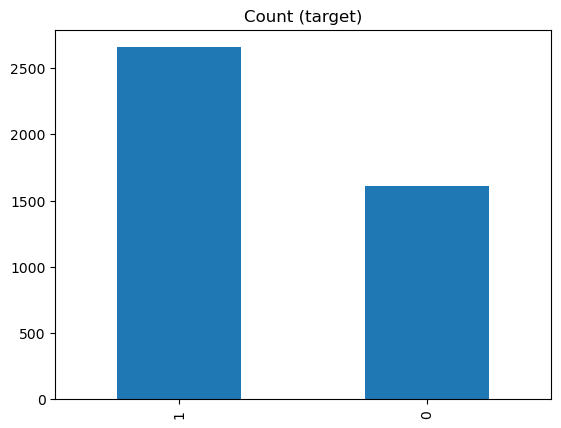

In [30]:
target_count = y.value_counts()
print("Class 0: ", target_count[0])
print("Class 1: ", target_count[1])

print("Proportion:", round(target_count[0] / target_count[1], 2), ": 1")

target_count.plot(kind = "bar", title = "Count (target)");

In [31]:
print("Before oversampling: ", Counter(y))

# Defining oversampler model
oversample = RandomOverSampler(random_state = 42)

# Fit and apply the transform
x_over, y_over = oversample.fit_resample(x,y)

# Summarize class distribution after oversampling
print("After oversampling: ", Counter(y_over))

Before oversampling:  Counter({1: 2656, 0: 1613})
After oversampling:  Counter({1: 2656, 0: 2656})


# EDA

- Heatmap
- Pairplot
- Correlation visualizations

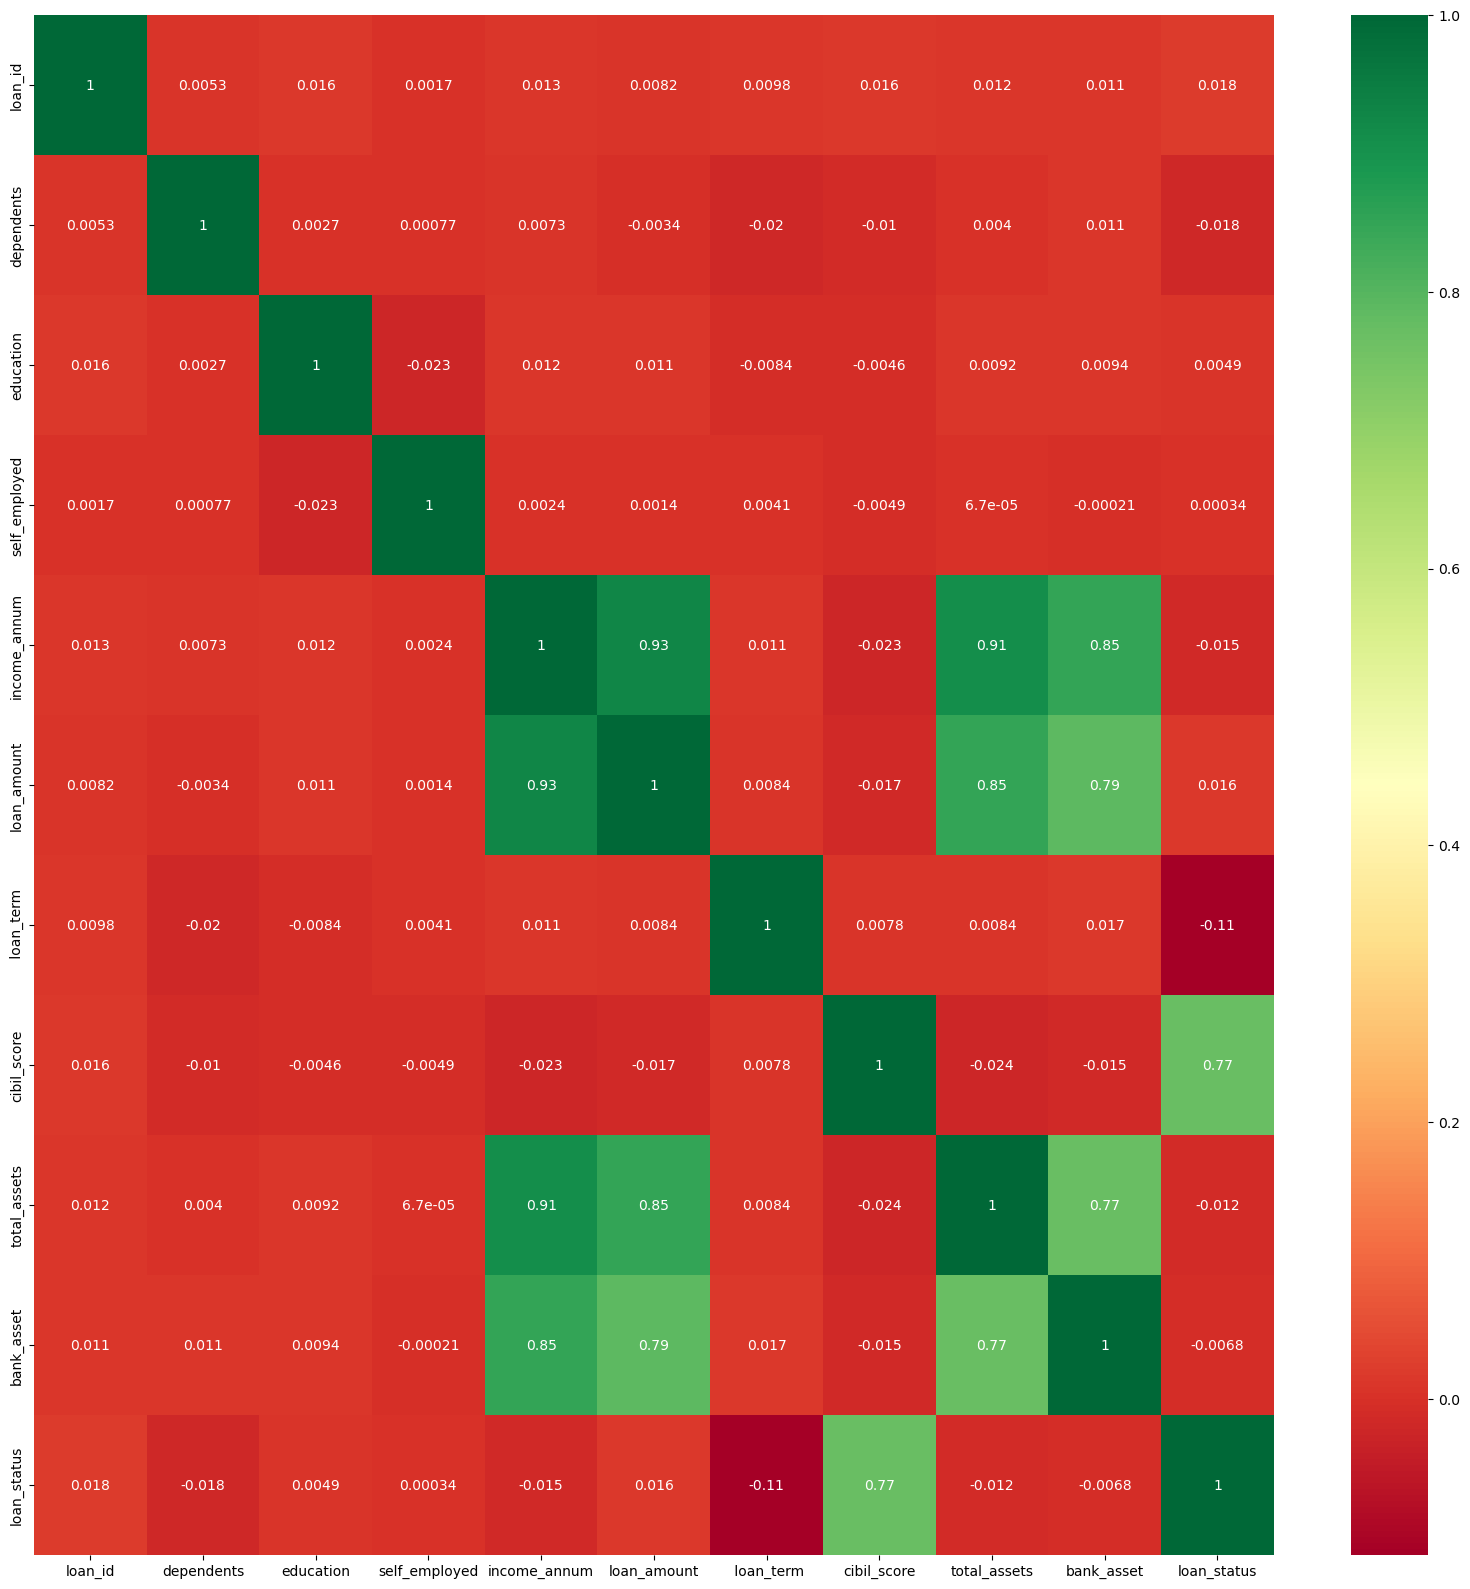

In [32]:
corrmatrix = loan_df.corr()

corr_features = corrmatrix.index

plt.figure(figsize = (20,20))

g = sns.heatmap(loan_df[corr_features].corr(), annot = True, cmap = "RdYlGn")

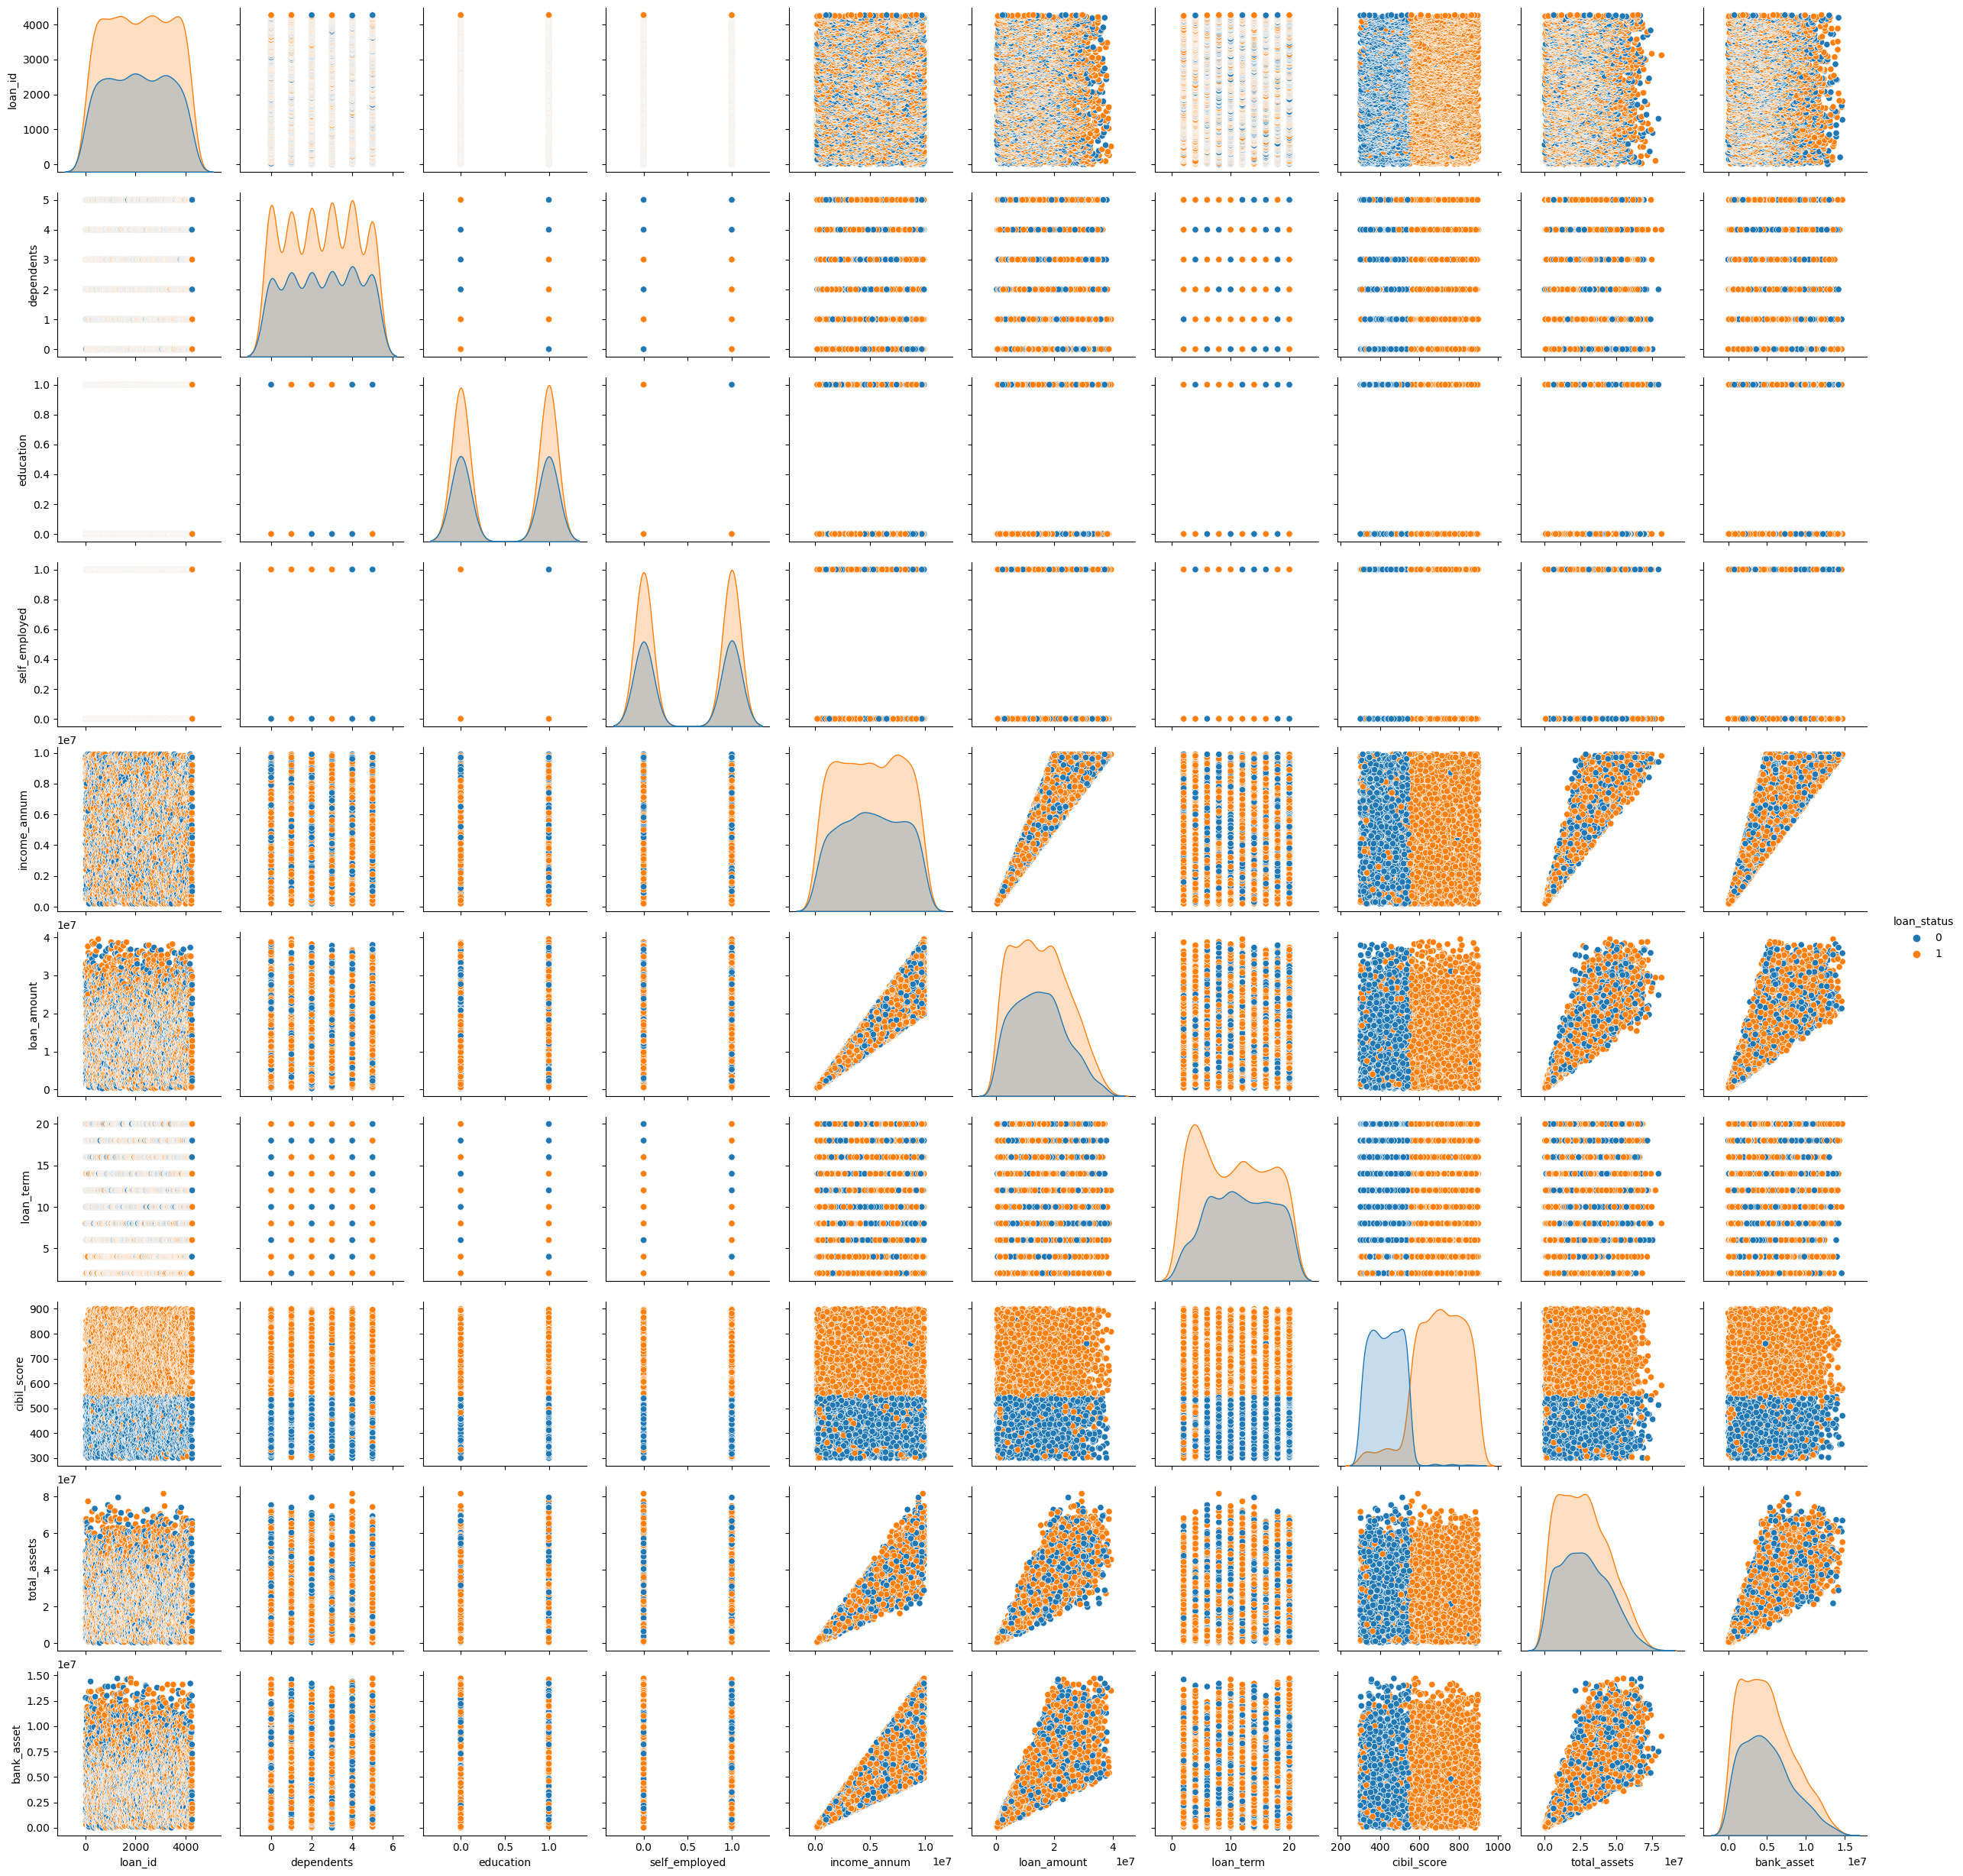

In [33]:
sns.pairplot(loan_df[corr_features], hue = "loan_status", diag_kind = "kde")
plt.show()

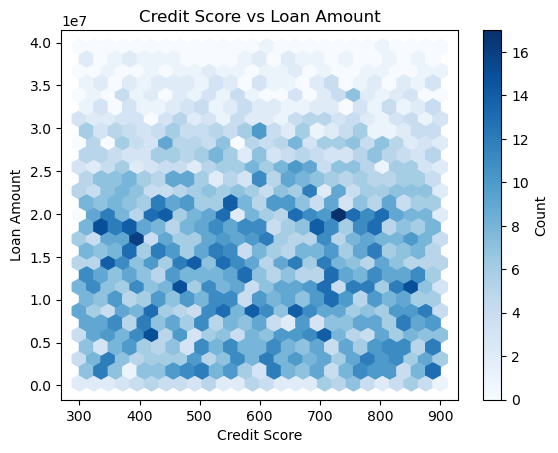

In [34]:
# Density Plot

plt.hexbin(loan_df["cibil_score"], loan_df["loan_amount"], gridsize = 25, cmap='Blues')
plt.colorbar(label = "Count")
plt.title("Credit Score vs Loan Amount")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

Text(0.5, 1.02, 'Scatter Plot of Annual Income vs. Loan Amount by Education')

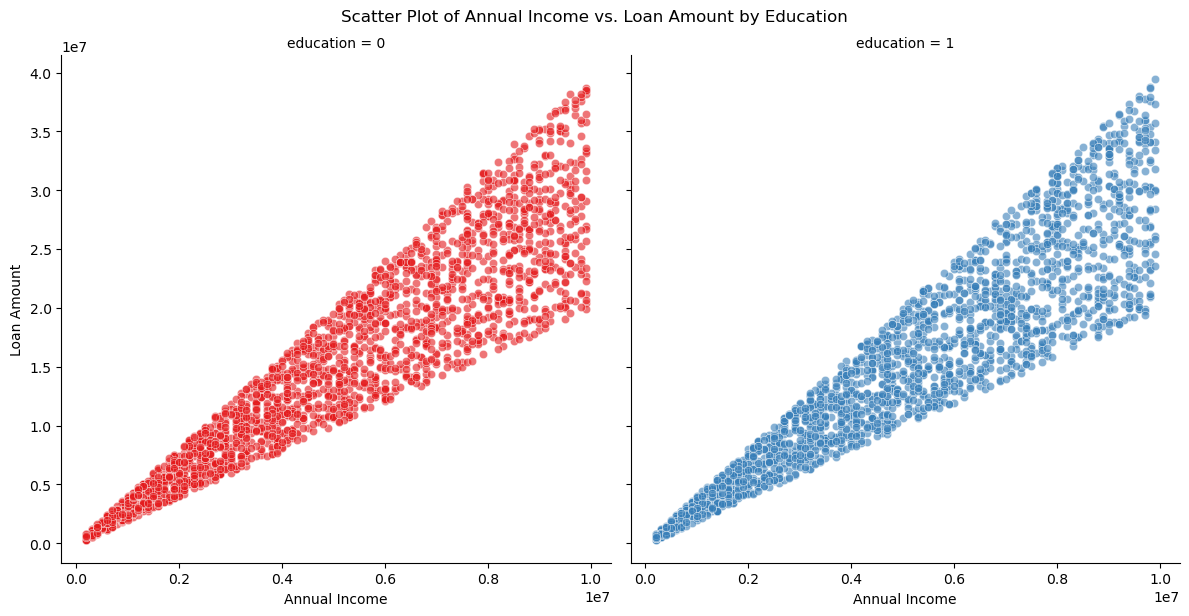

In [35]:
plot_1 = sns.FacetGrid(loan_df, col = "education", hue = "education", height = 6, palette="Set1")

# Map the scatter plot onto the grid
plot_1.map(sns.scatterplot, "income_annum", "loan_amount", alpha=0.6)

plot_1.set_axis_labels("Annual Income", "Loan Amount")
plot_1.fig.suptitle("Scatter Plot of Annual Income vs. Loan Amount by Education", y=1.02)


Text(0.5, 1.0, 'Hexbin Plot of Bank Asset vs. Loan Amount')

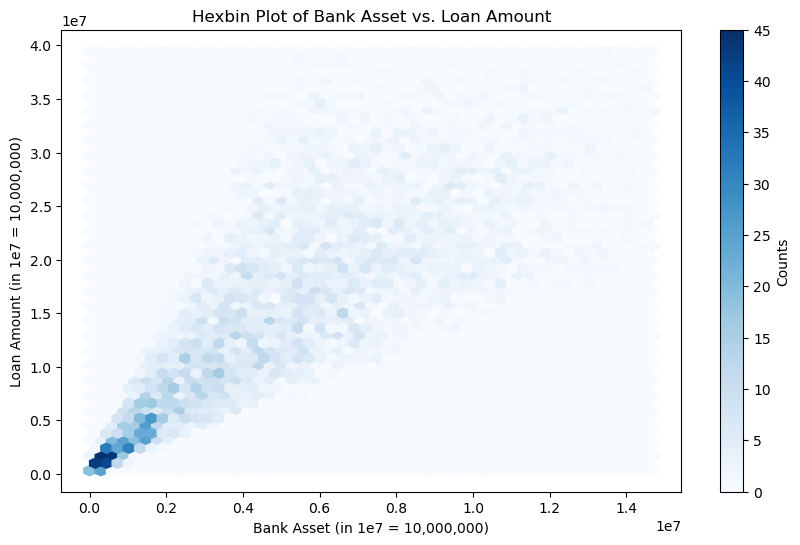

In [36]:
plt.figure(figsize=(10, 6))
plot_2 = plt.hexbin(loan_df['bank_asset'], loan_df['loan_amount'], gridsize=50, cmap='Blues')

# Add a color bar
bar = plt.colorbar(plot_2)
bar.set_label('Counts')

# Add axis labels and title
plt.xlabel("Bank Asset (in 1e7 = 10,000,000)")
plt.ylabel("Loan Amount (in 1e7 = 10,000,000)")
plt.title("Hexbin Plot of Bank Asset vs. Loan Amount")


# Model Training/Testing

- Logistic Regression
- KNN
- Gradient Boosting

[1.10349861e-03 1.02962701e-03 6.60997409e-04 4.47646966e-04
 1.32170284e-03 1.93599679e-03 1.14215100e-02 1.94337969e-01
 1.17577280e-03 1.00360247e-03 7.85561676e-01]


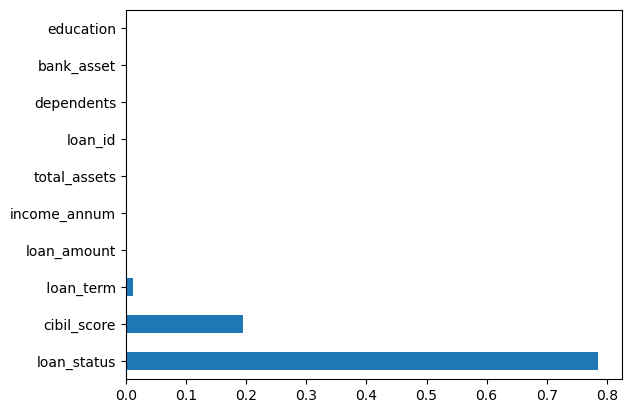

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_over, y_over)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = x_over.columns)
feat_importances.nlargest(10).plot(kind = "barh")
plt.show()

In [38]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.54


In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN model
k = 1
model_2 = KNeighborsClassifier(n_neighbors = k)
model_2.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [40]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
model_3 = GradientBoostingClassifier(n_estimators = 9, learning_rate = 0.01, max_depth = 3)
model_3.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
